In [1]:
import pickle

from scipy.spatial import distance
from matplotlib import pyplot as plt
from keras.datasets import cifar10

import tensorflow as tf
import tensorflow_hub as hub

import numpy as np
from PIL import Image
from math import comb

2022-11-20 01:25:00.836366: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-20 01:25:01.123567: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-20 01:25:01.123589: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-20 01:25:01.160880: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-20 01:25:01.911949: W tensorflow/stream_executor/platform/de

In [7]:
model_url = "https://tfhub.dev/tensorflow/efficientnet/lite0/feature-vector/2"

IMAGE_SHAPE = (370, 240)

layer = hub.KerasLayer(model_url, input_shape=IMAGE_SHAPE+(3,))
model = tf.keras.Sequential([layer])

def getEmbedding(file):

    embedding = model.predict(file[np.newaxis, ...])
    embedding_np = np.array(embedding)
    flattended_feature = embedding_np.flatten()

    return flattended_feature

1/1 [==============================] - 0s 39ms/step
[0.3950429]
the distance between bg and the myphone is [0.3950429]


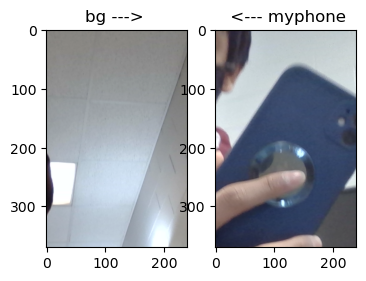

[0.40842503]
the distance between bg and the stephen is [0.40842503]


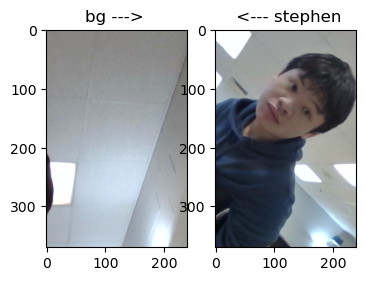

[0.27158031]
the distance between bg and the voo is [0.27158031]


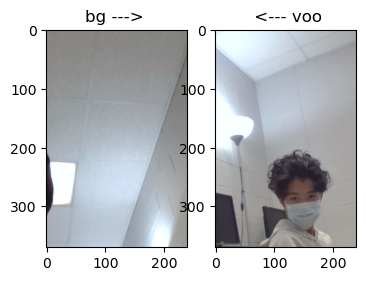

[0.27461698]
the distance between bg and the voophone is [0.27461698]


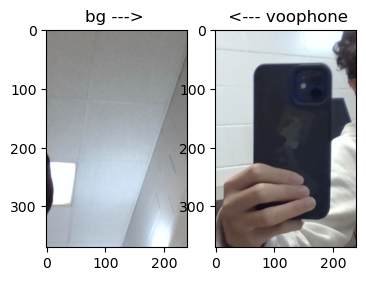

[0.4119249]
the distance between bg and the jason is [0.4119249]


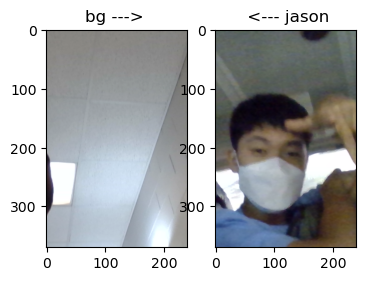

[0.19044267]
the distance between myphone and the stephen is [0.19044267]


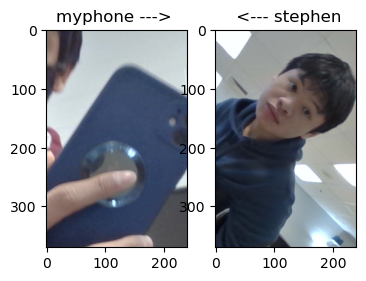

[0.29382376]
the distance between myphone and the voo is [0.29382376]


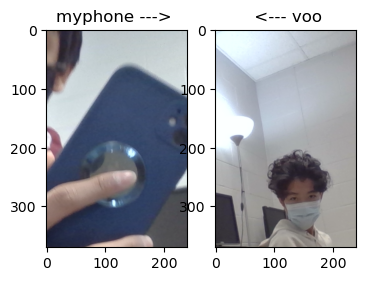

[0.25180017]
the distance between myphone and the voophone is [0.25180017]


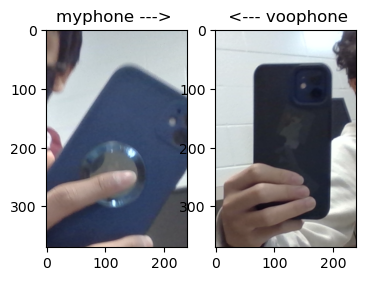

[0.21585651]
the distance between myphone and the jason is [0.21585651]


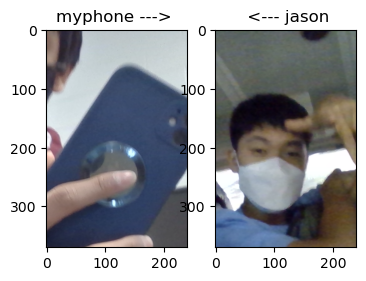

[0.28567978]
the distance between stephen and the voo is [0.28567978]


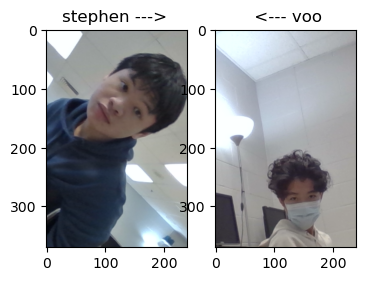

[0.22102413]
the distance between stephen and the voophone is [0.22102413]


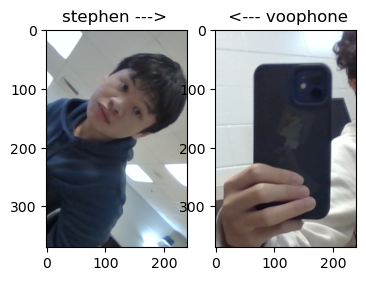

[0.14599359]
the distance between stephen and the jason is [0.14599359]


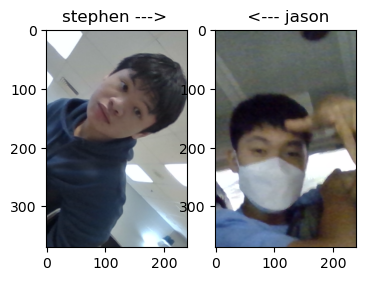

[0.21659334]
the distance between voo and the voophone is [0.21659334]


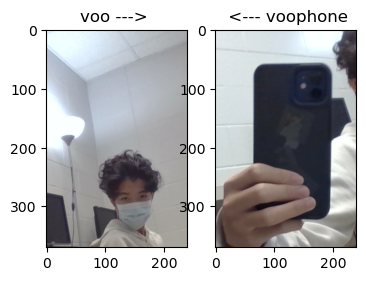

[0.25961207]
the distance between voo and the jason is [0.25961207]


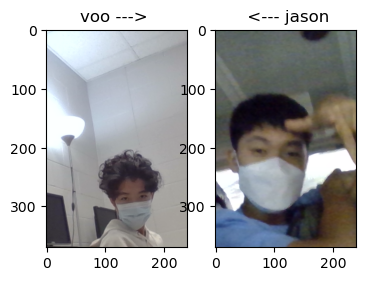

[0.21974937]
the distance between voophone and the jason is [0.21974937]


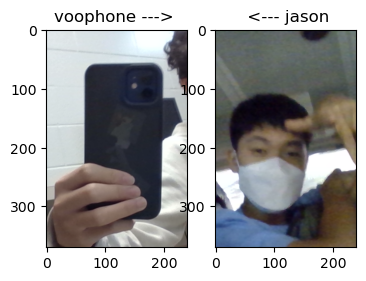

In [8]:
imageNames = ['bg', 'myphone', 'stephen', 'voo', 'voophone', 'jason']

imageList = []
displayList = []

for l in imageNames:
    newImg = np.asarray(Image.open(f'matchedImages/{l}.jpg').convert('RGB'))
    algImg = newImg.transpose(2, 0, 1).flatten()

    imageList.append(getEmbedding(newImg))
    displayList.append(newImg)

imageList = np.array(imageList)
displayList = np.array(displayList)

for i in range(len(imageList)):

    for e in range(i+1, len(imageList)):

        label1 = imageNames[i]
        label2 = imageNames[e]

        img1 = imageList[i]
        img2 = imageList[e]

        pic1 = displayList[i]
        pic2 = displayList[e]

        metric = 'cosine'

        cosineDistance = distance.cdist([img1], [img2], metric)[0]
        print(cosineDistance)
        print("the distance between {} and the {} is {}".format(label1, label2, cosineDistance))
        
        fig = plt.figure(figsize=(4, 50))

        fig.add_subplot(1, 2, 1)
        plt.imshow(pic1)
        plt.title(str(label1) + ' ---> ')

        fig.add_subplot(1, 2, 2)
        plt.imshow(pic2)
        plt.title(' <--- ' + str(label2))

        plt.show()